## InvestCraft : Intelligent Money Management  

### Team Members
- Harshil Bhatt
- Jainil Padmani   
- Prince Kakkad
# Objective
The goal of our project is to build a machine learning model. The model will be trained on a dataset of investor profiles, which includes information about the investor's age, income, net worth, investment experience, and other relevant factors. The model will predict the investor's risk tolerance on a scale from 1 to 10, with 1 being very risk averse and 10 being very risk tolerant. The robo-advisor dashboard will use the model to recommend investment strategies and portfolios that are appropriate for the investor's risk tolerance level.


<a id='0'></a>
# 1. Problem Definition

In the supervised regression framework used for this case study, the predicted variable
is the “true” risk tolerance of an individual10 and the predictor variables are demo‐
graphic, financial and behavioral attributes of an individual

For this case study the data used is from survey of Consumer Finances which is conducted by the Federal Reserve
Board. The data source is : 
https://www.federalreserve.gov/econres/scf_2009p.htm

The data is a survey of consumer finances and it contains information about the financial situation of the individuals. The data contains information about the income, net worth, age, education, and other relevant factors of the individuals. The data also contains information about the risk tolerance of the individuals, which is measured on a scale from 1 to 10, with 1 being very risk intolerant and 10 being very risk tolerant.

<a id='1'></a>
# 2. Getting Started- Loading the data and python Library

<a id='1.1'></a>
## 2.1. Loading the python packages

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import copy

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor  # Using MLPRegressor from Scikit-learn

# Libraries for Statistical Models
import statsmodels.api as sm

# Libraries for Saving the Model
from pickle import dump, load


<a id='1.2'></a>
## 2.2. Loading the Data

In [3]:
# load dataset
dataset = pd.read_excel('SCFP2009panel.xlsx')

In [4]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [6]:
dataset.shape

(19285, 515)

<a id='2'></a>
## 3. Data Preparation and Feature Selection

<a id='2.1'></a>
## 3.1. Preparing the predicted variable

The dataset from "Survey of Consumer Finances" contains the Household's demographics, net worth, financial and non-financial assets for the same demographics in 2007 (pre-crisis) and 2009(post-crisis). 

We prepare the predicted variable, which is the "true" risk tolerance in the following steps. There are different ways of getting the "true" risk tolerance. The idea and the purpose of this project is to come up with an approach to solve the behavioral finance problem using ML. 

The steps to compute the predicted variables are as follows: 

1) Compute the Risky asset and the riskless assets for all the individuals in the survey data. Risky and riskless assets are defined as follows: 
* **Risky assets** is investments in mutual funds, stocks, bonds, commodities, and
real estate, and an estimate of human capital. 
* **Risk Free Assets**: checking and savings balances,certificates of deposit, and other cash balances and equivalents.

2) We take the ratio of risky assets to total assets of an investor and consider that as a measure of risk tolerance of an investor. From the data of Survey of Consumer Finances (SCF), we have the data of risky and riskless assets for the individuals for 2007 and 2009. We use this data and normalise the risky assets with the stock price of 2007 vs. 2009 to get risk tolerance. 

* **Risk Tolerance**  just defined as the ratio of Risky Asset to Riskless Assets normalised with the average S&P500 of 2007 vs 2009. 
Average S&P500 in 2007: 1478
Average S&P500 in 2009: 948

    S&P500 decreased by 36% from 2007 to 2009.
* **Meaning of S&P:** The S&P 500, or simply the S&P, is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices, and many consider it to be one of the best representations of the U.S. stock market.

3) In a lot of literature, an intelligent investor is the one who doesn't change its risk tolerance during the change in the market. So, we consider the investors who change their risk tolerance by less than 10% between 2007 and 2009 as the intelligent investors.

In [7]:
#Average SP500 during 2007 and 2009
Average_SP500_2007=1478
Average_SP500_2009=948

##############Risk Tolerance 2007##############

#LIQ07: Liquid Assets 2007
#CDS07: Certificates of Deposit 2007
#SAVBND07: Savings Bonds 2007
#CASHLI07: Cash Value Life Insurance 2007
#NMMF07: Money Market Funds 2007
#STOCKS07: Stocks 2007
#BOND07: Bonds 2007
#RT07: Risk Tolerance 2007
dataset['RiskFree07']= dataset['LIQ07'] + dataset['CDS07'] + dataset['SAVBND07'] + dataset['CASHLI07']
dataset['Risky07'] = dataset['NMMF07'] + dataset['STOCKS07'] + dataset['BOND07'] 
dataset['RT07'] = dataset['Risky07']/(dataset['Risky07']+dataset['RiskFree07'])


##############Risk Tolerance 2009##############

#LIQ09: Liquid Assets 2009
#CDS09: Certificates of Deposit 2009
#SAVBND09: Savings Bonds 2009
#CASHLI09: Cash Value Life Insurance 2009
#NMMF09: Money Market Funds 2009
#STOCKS09: Stocks 2009
#BOND09: Bonds 2009
#RT09: Risk Tolerance 2009
dataset['RiskFree09']= dataset['LIQ09'] + dataset['CDS09'] + dataset['SAVBND09'] + dataset['CASHLI09']
dataset['Risky09'] = dataset['NMMF09'] + dataset['STOCKS09'] + dataset['BOND09'] 
dataset['RT09'] = dataset['Risky09']/(dataset['Risky09']+dataset['RiskFree09'])*\
                (Average_SP500_2009/Average_SP500_2007)

In [8]:
dataset2 = copy.deepcopy(dataset)  
dataset.head()

YY1  Y1         WGT09  AGE07  AGECL07  EDUC07  EDCL07  MARRIED07  KIDS07  \
0    1  11  11668.134198     47        3      12       2          1       0   
1    1  12  11823.456494     47        3      12       2          1       0   
2    1  13  11913.228354     47        3      12       2          1       0   
3    1  14  11929.394266     47        3      12       2          1       0   
4    1  15  11917.722907     47        3      12       2          1       0   

   LIFECL07  ...  TRANSFOTHINCPCT  PSAVINGPCT  LEVERAGEPCT   I   RiskFree07  \
0         2  ...              0.0   93.125197   270.403054  57  7994.813847   
1         2  ...              0.0   93.125197   249.593620  57  7994.813847   
2         2  ...              0.0   93.125197   209.233358  57  7984.457871   
3         2  ...              0.0   93.125197   209.273158  57  7984.457871   
4         2  ...              0.0   93.125197   232.690767  57  7994.813847   

   Risky07  RT07  RiskFree09  Risky09      RT09  
0      0.0   0.0       16000    17000  0.330422  
1      0.0   0.0       19000    18000  0.312036  
2      0.0   0.0       13000    12000  0.307876  
3      0.0   0.0       25000    13000  0.219429  
4      0.0   0.0       17000    12000  0.265410  

[5 rows x 521 columns]

Let us compute the percentage change in risk tolerance between 2007 and 2009. 

In [9]:
dataset2['PercentageChange'] = np.abs(dataset2['RT09']/dataset2['RT07']-1)

Checking for the rows with null or nan values and removing them.

In [10]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset2.isnull().values.any())

Null Values = True


In [11]:
# Drop the rows containing NA
dataset2=dataset2.dropna(axis=0)

dataset2 = dataset2[~dataset2.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

#Checking for any null values and removing the null values'''
print('Null Values =',dataset2.isnull().values.any())

Null Values = False


Let us plot the risk tolerance of 2007 and 2009. 

<Axes: xlabel='RT07'>

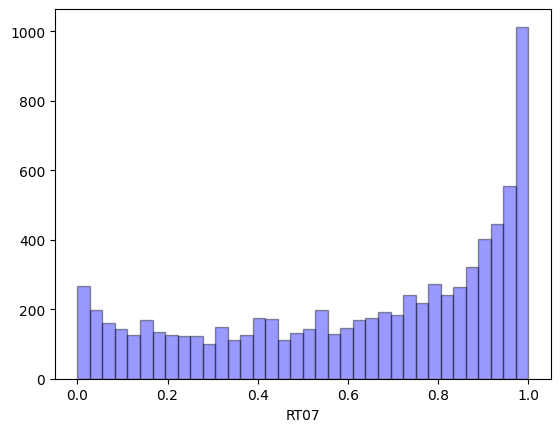

In [12]:
sns.distplot(dataset2['RT07'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Looking at the risk tolerance of 2007, we see that a significant number of individuals had risk tolerance close to one.Meaning the investment ws more skewed towards the risky assets as compared to the riskless assets. Now let us look at the risk tolerance of 2009.

<Axes: xlabel='RT09'>

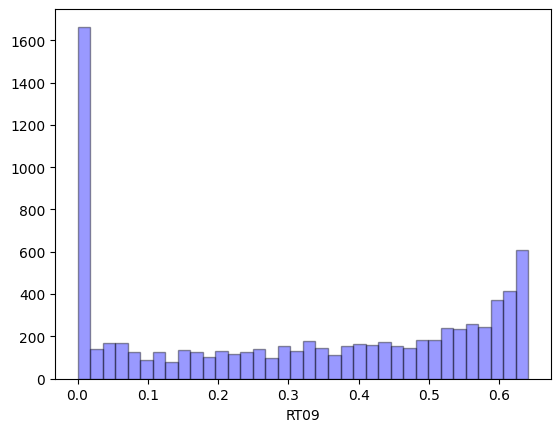

In [13]:
sns.distplot(dataset2['RT09'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Clearly, the behavior of the individuals reversed in 2009 after crisis and majority of the investment was in risk free assets. Overall risk tolerance decreased, which is shown by majority of risk tolerance being close to 0 in 2009. 



**In the next step we pick the intelligent investors whose risk tolerance change between 2007 and 2009 was less than 10%.**

In [14]:
dataset3 = copy.deepcopy(dataset2)  

In [15]:
dataset3 = dataset3[dataset3['PercentageChange']<=.1]
dataset3

YY1     Y1         WGT09  AGE07  AGECL07  EDUC07  EDCL07  MARRIED07  \
60       14    141  13732.681713     77        6      12       2          1   
425      95    951     43.840398     55        4      17       4          1   
1122    253   2533    297.850586     85        6      17       4          1   
1190    270   2701   7184.506057     40        2      12       2          1   
1228    279   2794   4340.608277     70        5      12       2          1   
...     ...    ...           ...    ...      ...     ...     ...        ...   
19190  4402  44021   5873.843391     53        3      16       4          1   
19191  4402  44022   5939.807789     53        3      16       4          1   
19192  4402  44023   5970.026444     53        3      16       4          1   
19193  4402  44024   5993.081847     53        3      16       4          1   
19194  4402  44025   5955.134573     53        3      16       4          1   

       KIDS07  LIFECL07  ...   PSAVINGPCT  LEVERAGEPCT   I    RiskFree07  \
60          0         6  ...  1000.080237   -35.900702  57  1.170225e+04   
425         1         5  ...   -16.807607   -54.021909  57  1.102911e+06   
1122        0         5  ...  1061.195805     0.000000  57  2.148865e+06   
1190        3         3  ...    19.213085  -100.000000  57  2.122975e+03   
1228        0         5  ...    93.125197   -53.466186  57  1.788477e+05   
...       ...       ...  ...          ...          ...  ..           ...   
19190       0         2  ...   479.375591    13.545972  57  2.278315e+04   
19191       0         2  ...   479.375591    -9.418465  57  2.174755e+04   
19192       0         2  ...   479.375591   -18.158422  57  2.278315e+04   
19193       0         2  ...   479.375591   -21.165892  57  2.278315e+04   
19194       0         2  ...   479.375591    31.458701  57  2.278315e+04   

            Risky07      RT07  RiskFree09   Risky09      RT09  \
60     2.899673e+03  0.198582       11000      5000  0.200440   
425    2.226535e+06  0.668740     1354500  30550000  0.614176   
1122   3.075725e+06  0.588702       70000    824000  0.591185   
1190   1.656956e+03  0.438356       12300     25000  0.429898   
1228   5.488668e+04  0.234825      331500    175000  0.221612   
...             ...       ...         ...       ...       ...   
19190  1.242717e+04  0.352941       19000     23000  0.351247   
19191  1.242717e+04  0.363636       19000     23000  0.351247   
19192  1.242717e+04  0.352941       19000     23000  0.351247   
19193  1.242717e+04  0.352941       19000     23000  0.351247   
19194  1.242717e+04  0.352941       19000     23000  0.351247   

       PercentageChange  
60             0.009357  
425            0.081592  
1122           0.004219  
1190           0.019296  
1228           0.056269  
...                 ...  
19190          0.004801  
19191          0.034071  
19192          0.004801  
19193          0.004801  
19194          0.004801  

[355 rows x 522 columns]

We assign the true risk tolerance as the average risk tolerance of these intelligent investors between 2007 and 2009. This is the predicted variable for this Project. The purpose would be to predict the true risk tolerance of an individuals given the demographic, financial and willingness to take risk related features. 

In [16]:
dataset3['TrueRiskTolerance'] = (dataset3['RT07'] + dataset3['RT09'])/2

Let us drop other labels which might not be needed for the prediction. 

In [17]:
dataset3.drop(labels=['RT07', 'RT09'], axis=1, inplace=True)
dataset3.drop(labels=['PercentageChange'], axis=1, inplace=True)

<a id='2.2'></a>
## 3.2. Feature Selection-Limit the Feature Space 

<a id='2.2.2'></a>
### 3.2.2.  Features elimination

In order to filter the features further we do the following:
1. Check the description in the Data Dictionary (https://www.federalreserve.gov/econres/files/codebk2009p.txt, https://www.federalreserve.gov/econresdata/scf/files/fedstables.macro.txt)and only keep the features that are intuitive
The description is as follows: 


* AGE: There are 6 age categories, where 1 represents age less than 35 and 6 represents age more than 75. (<35, 35-44, 45-54, 55-64, 65-75, >75)
* EDUC: There are 4 education categories, where 1 represents no high school and 4 represents college degree. (No high school, High school, some college, college degree)
* EXPERIENCE: It represents the experience of the investor in the market. There are 4 categories, where 1 represents no experience and 4 represents more than 10 years of experience.(No experience, 1-4 years, 5-10 years, >10 years)
* MARRIED: It represents marital status. There are two categories where 1 represents married and 2 represents unmarried. (Married, Unmarried)
* OCCU: It represents occupation category. 1 represents managerial category and 4 represents unemployed.(Managerial, Professional, Sales, Unemployed)
* KIDS: It represents number of kids. (0, 1, 2, 3, 4, 5)
* NWCAT: It represents net worth category. There are 5 categories, where 1 net worth less than 25 percentile and 5 represents net worth more than 90th percentile. (<25%, 25-49%, 50-74%, 75-89%, >90%)
* INCCL: It represents income category. There are 5 categories, where 1 income less than 10,000 and 5 represents net worth more than 100,000(<10,000, 10,000-24,999, 25,000-49,999, 50,000-99,999, >100,000)
* RISK: It represents the willingness to take risk on a scale of 1 to 4, where 1 represents highest level of willingness to take risk. (1, 2, 3, 4)

2. Keep only the intuitive factors as of 2007 only and remove all the intermediate features and features related to 2009, as the variables of 2007 are the only ones required for predicting the risk tolerance.


In [18]:
keep_list2 = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07','NETWORTH07','TrueRiskTolerance']

drop_list2 = [col for col in dataset3.columns if col not in keep_list2]

dataset3.drop(labels=drop_list2, axis=1, inplace=True)

Let us look at the correlation among the features.

<Axes: title={'center': 'Correlation Matrix'}>

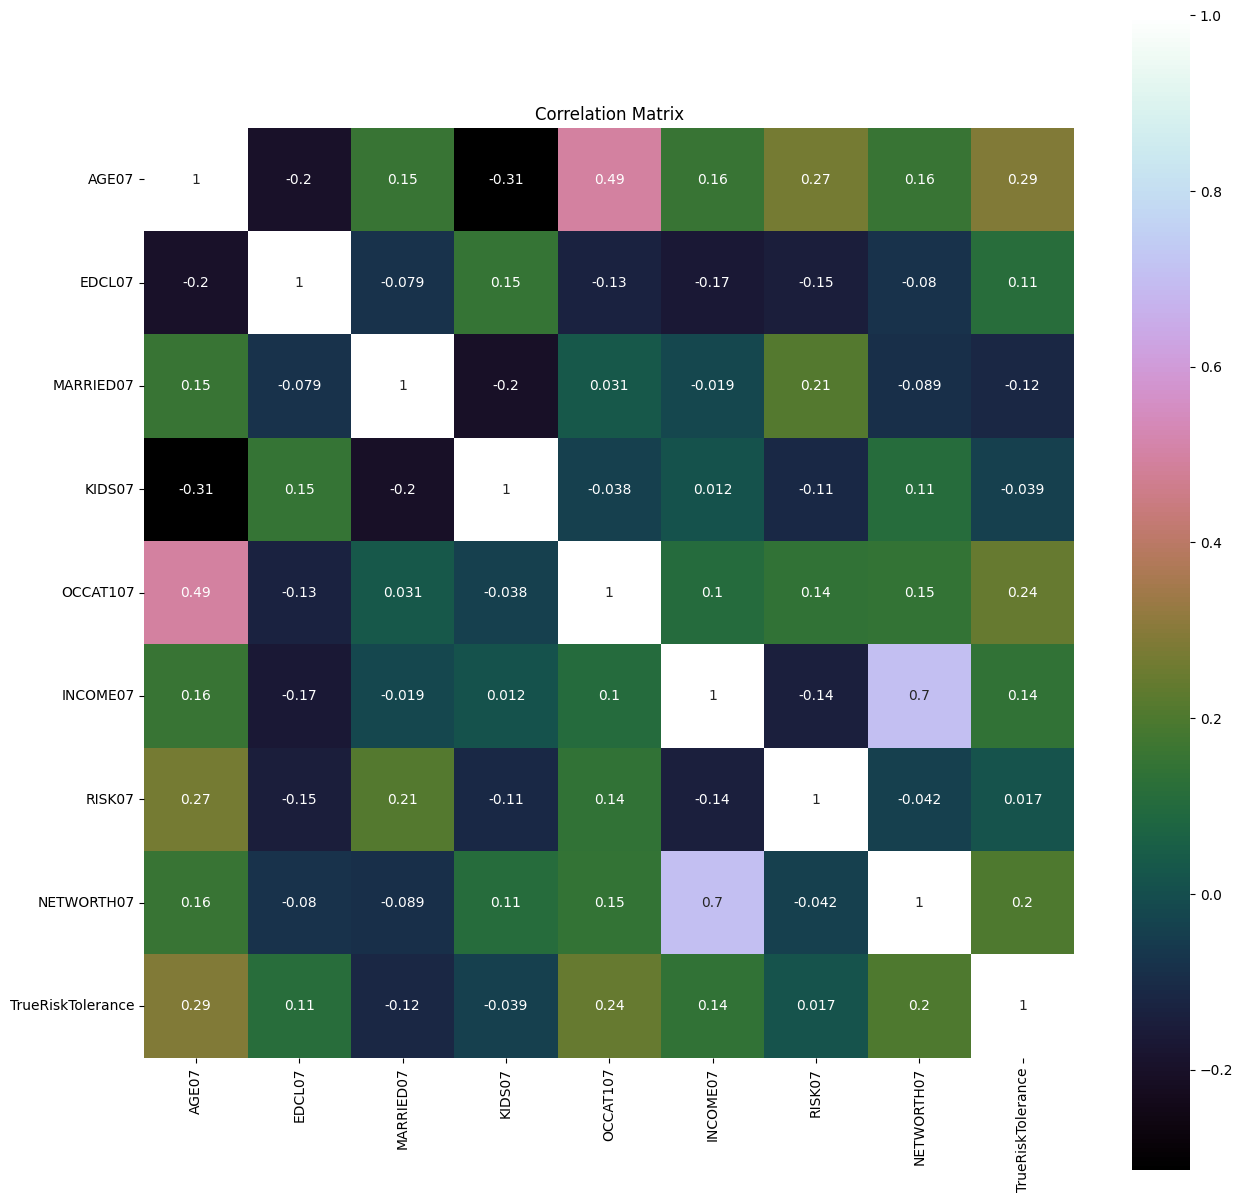

In [19]:
# correlation
correlation = dataset3.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1500x1500 with 0 Axes>

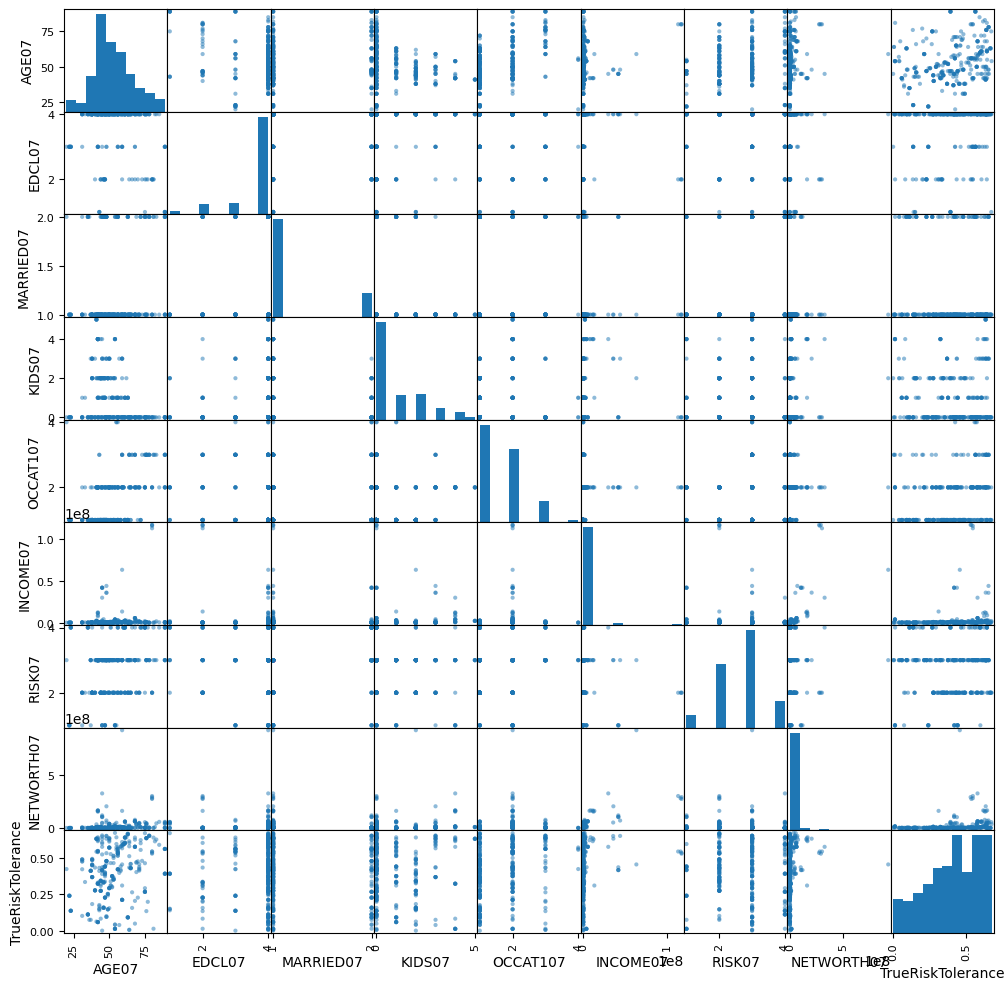

In [20]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix
plt.figure(figsize=(15,15))
scatter_matrix(dataset3,figsize=(12,12))
plt.show()

Looking at the correlation chart above, networth and income are positively correlated with the risk tolerance.
With more number of kids and marriage the risk tolerance decreases. As the willingness to take risk decreases the risk tolerance decreases. With age there is a positive relationship of the risk tolerance. 

As per the paper "Does Risk Tolerance Decrease With Age?(Hui Wang1,Sherman Hanna)", Relative risk intolerant decreases as people age (i.e., the proportion of net wealth invested in risky assets increases as people age) when other variables are held constant.Therefore, risk tolerance increases with age. 

So, in summary all the variables and their relationship with risk tolerance seems intuitive. 

<a id='4'></a>
# 4. Evaluate Algorithms and Models

Let us evaluate the algorithms and the models. 

<a id='4.1'></a>
## 4.1. Train Test Split

Performing a train and test split in this step. 

In [21]:
# split out validation dataset for the end
Y= dataset3["TrueRiskTolerance"]
X = dataset3.loc[:, dataset3.columns != 'TrueRiskTolerance']
# scaler = StandardScaler().fit(X)
# rescaledX = scaler.transform(X)
validation_size = 0.2
seed = 3
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

<a id='4.2'></a>
## 4.2. Test Options and Evaluation Metrics


In [22]:
# test options for regression
num_folds = 10
#scoring = 'neg_mean_squared_error'
#scoring ='neg_mean_absolute_error'
scoring = 'r2'

<a id='4.3'></a>
## 4.3. Compare Models and Algorithms

### Regression Models

In [23]:
# spot check the algorithms
models = []
#Linear Models 
models.append(('LR', LinearRegression()))
#Lasso and ElasticNet Regression (Lasso define: Least Absolute Shrinkage and Selection Operator)
models.append(('LASSO', Lasso()))
#Elastic Net Regression(Combine the properties of both LASSO and Ridge)
models.append(('EN', ElasticNet()))
#Nonlinear Models(K-Nearest Neighbors Meaning that the class of a data point is determined by the majority class of its K nearest neighbors)
models.append(('KNN', KNeighborsRegressor()))
#Classification and Regression Trees
models.append(('CART', DecisionTreeRegressor()))
#Support Vector Machines
models.append(('SVR', SVR()))
#Neural Network
#models.append(('MLP', MLPRegressor()))
#Ensable Models 
# Boosting methods (meaning: ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones.)
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods (meaning: ensemble meta-algorithm to improve the accuracy and stability of machine learning algorithms used in statistical classification and regression)
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

# K-folds cross validation

### Why K-folds cross validation?
The K-Fold Cross Validation works by first dividing the dataset into k-subsets. Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts. We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The algorithm is trained and tested k times and the average performance of the model is reported. The key benefit of this technique is that it matters less how the data gets divided. Every data point gets to be in a test set exactly once, and gets to be in a training set k-1 times. The variance of the resulting estimate is reduced as k is increased. The downside of this technique is that the training algorithm has to be rerun from scratch k times, which means it takes k times as much computation to make an evaluation.

In [24]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    # converted mean square error to positive. The lower, the better
    cv_results = -1 * cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -0.102704 (0.179297)
LASSO: -0.041555 (0.109033)
EN: -0.047729 (0.108990)
KNN: -0.424558 (0.141425)
CART: -0.556712 (0.244786)
SVR: -0.127821 (0.100887)
ABR: -0.386101 (0.143458)
GBR: -0.615528 (0.140343)
RFR: -0.707797 (0.095959)
ETR: -0.687859 (0.147347)


### Algorithm comparison

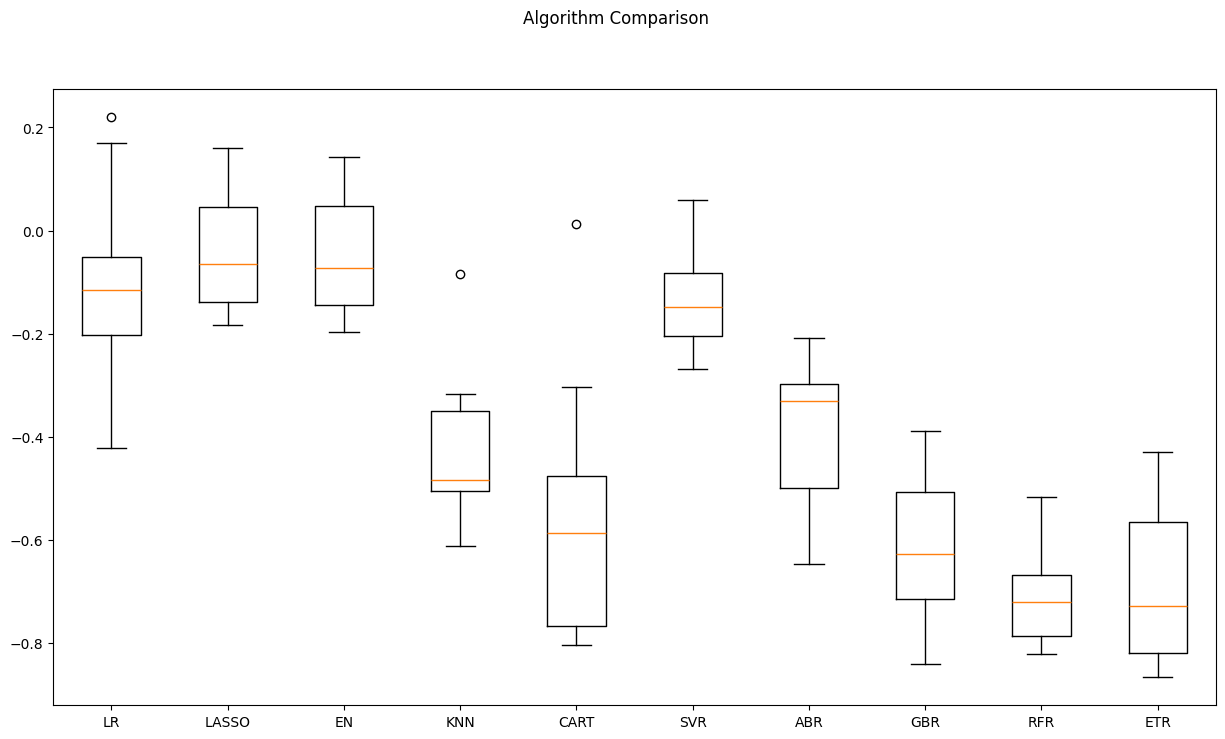

In [25]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

The non linear models perform better than the linear models, which means that a non linear relationship between the risk tolerance and the difference variables use to predict it. Given random forest regression is one of the best methods, we use it for further grid search. 

<a id='5'></a>
# 5. Model Tuning and Grid Search

Given that the Random Forest is the best model, Grid Search is performed on Random Forest.

In [26]:
# 8. Grid search : RandomForestRegressor 
'''
n_estimators : integer, optional (default=10)
    The number of trees in the forest.
'''
param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400]}
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.719095 using {'n_estimators': 150}
0.692053 (0.104624) with: {'n_estimators': 50}
0.702715 (0.091822) with: {'n_estimators': 100}
0.719095 (0.109272) with: {'n_estimators': 150}
0.708281 (0.101708) with: {'n_estimators': 200}
0.706691 (0.112462) with: {'n_estimators': 250}
0.718510 (0.099453) with: {'n_estimators': 300}
0.704934 (0.106576) with: {'n_estimators': 350}
0.707259 (0.099740) with: {'n_estimators': 400}


Random forest with number of estimators 200, is the best model after grid search. 

<a id='6'></a>
# 6. Finalise the Model

Finalize Model with best parameters found during tuning step.

<a id='6.1'></a>
## 6.1. Results on the Test Dataset

In [27]:
# prepare model
model = RandomForestRegressor(n_estimators = 200)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200)

In [28]:
from sklearn.metrics import r2_score
predictions_train = model.predict(X_train)
print(r2_score(Y_train, predictions_train))

0.9636458536551264


In [29]:
# estimate accuracy on validation set
# transform the validation dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_validation)
print(mean_squared_error(Y_validation, predictions))
print(r2_score(Y_validation, predictions))

0.007974270519583937
0.7555505685060797


From the mean square error and R2 shown above for the test set, the results look good. 

<a id='6.2'></a>
## 6.2. Feature Importance and Features Intuition

Looking at the details above Random forest be worthy of further study.
Let us look into the Feature Importance of the RF model

[0.22061681 0.02517912 0.01528536 0.04683376 0.02311593 0.23581133
 0.05641381 0.37674387]


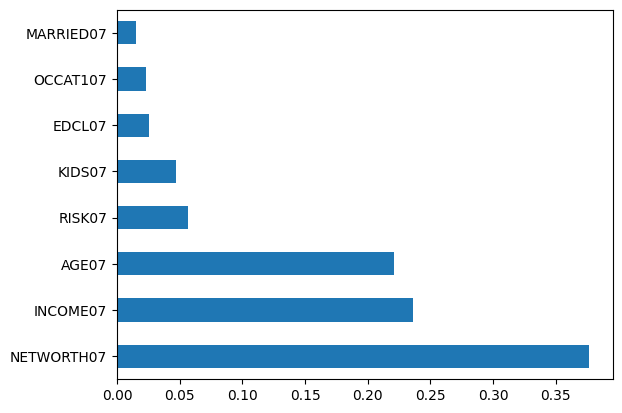

In [30]:
import pandas as pd
import numpy as np
model = RandomForestRegressor(n_estimators= 200,n_jobs=-1)
model.fit(X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

From the chart above, income and networth followed by age and willingness to take risk are the key variables to decide the risk tolerance. These variables have been considered as the key variables to model the risk tolerance across several literature. 

<a id='6.3'></a>
## 6.3. Save Model for Later Use

In [31]:
# Save Model Using Pickle
from pickle import dump
from pickle import load

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

In [32]:
# load the model from disk
loaded_model = load(open(filename, 'rb'))
# estimate accuracy on validation set
predictions = loaded_model.predict(X_validation)
result = mean_squared_error(Y_validation, predictions)
print(r2_score(Y_validation, predictions))
print(result)

0.7595116096231718
0.00784505601000684


__Conclusion__:

We showed that machine learning models might be able to objectively
analyze the behavior of different investors in a changing market and attribute these
changes to variables involved in determining risk appetite. With an increase in the
volume of investor’s data and availability of rich machine learning infrastructure,
such models might prove to be more useful.

We saw that there is a non-linear relationship between the variables and the risk tolerance. Income and net worth followed by age and willingness to take risk are the key variables to decide the risk tolerance. These variables have been considered as the key variables to model the risk tolerance across several literature.
